# Important boilerplate codes pertaining to model evaluation

In [1]:
from models.catsvsdogsmodel import CatsVsDogsModel
from model_eval import get_latest_checkpoint, get_model_score, get_checkpoint_by_model_number, get_latest_checkpoint_number
import torch.nn as nn
from helpers import create_dataloader
from models.customVgg import custom_vgg
from models.resnet import ResNet, ResidualBlock
import pickle 



## Get Latest Checkpoint

In [3]:
# load model
task_name = "task1"
model = CatsVsDogsModel()
checkpoint = get_latest_checkpoint(task_name=task_name)
model.load_state_dict(checkpoint['model_state_dict'])


test_dataloader = create_dataloader(
    data_path="data/test"
)

# load loss function
criterion = nn.BCELoss()

get_model_score(
    model=model,
    dataloader=test_dataloader,
    criterion=criterion)

Checkpoint 20 loaded


100%|██████████| 625/625 [00:09<00:00, 68.56it/s]


(0.8055999875068665, 1.2752277851104736)

In [4]:
# load model
task_name = "task1"
model = CatsVsDogsModel()
checkpoint = get_latest_checkpoint(task_name=task_name)
model.load_state_dict(checkpoint['model_state_dict'])

val_data_path = "data/val/"

val_dataloader = create_dataloader(
    data_path=val_data_path
)

# load loss function
criterion = nn.BCELoss()

get_model_score(
    model=model,
    dataloader=val_dataloader,
    criterion=criterion)


Checkpoint 20 loaded


100%|██████████| 625/625 [00:08<00:00, 70.73it/s]


(0.8055999875068665, 1.2752277851104736)

In [4]:
# load model
task_name = "task2"
model = custom_vgg()
checkpoint = get_latest_checkpoint(task_name=task_name)
model.load_state_dict(checkpoint['model_state_dict'])

val_data_path = "data/val/"

val_dataloader = create_dataloader(
    data_path=val_data_path
)

# load loss function
criterion = nn.BCELoss()

get_model_score(
    model=model,
    dataloader=val_dataloader,
    criterion=criterion)

Checkpoint 3 loaded


100%|██████████| 623/623 [02:32<00:00,  4.09it/s]


(0.9582329392433167, 0.11219563335180283)

## Get Model Scores

In [7]:
# load model
task_name = "task3"
model = ResNet(ResidualBlock, [2, 2, 2, 2], num_classes=1)
checkpoint = get_latest_checkpoint(task_name=task_name)
model.load_state_dict(checkpoint['model_state_dict'])

test_data_path = "data/test/"

test_dataloader = create_dataloader(
    data_path=test_data_path
)


# load loss function
criterion = nn.BCELoss()

get_model_score(
    model=model,
    dataloader=test_dataloader,
    criterion=criterion)

Checkpoint 5 loaded


100%|██████████| 625/625 [00:24<00:00, 25.12it/s]


(0.909600019454956, 0.22913144528865814)

## Get All Model Scores by Epoch for any Dataset

In [3]:
task_name = "task3"
data_path = "data/val/"

epochs = get_latest_checkpoint_number(task_name)

dataloader = create_dataloader(data_path)

criterion = nn.BCELoss()

epoch_val_accuracys = []
epoch_val_losses = []

for i in range(epochs):
    model = ResNet(ResidualBlock, [2, 2, 2, 2], num_classes=1)
    checkpoint = get_checkpoint_by_model_number(task_name, i+1)
    model.load_state_dict(checkpoint['model_state_dict'])
    accuracy, loss = get_model_score(model=model, dataloader=dataloader, criterion=criterion)
    epoch_val_accuracys.append(accuracy)
    epoch_val_losses.append(loss)
    
    

Checkpoint 1 loaded


100%|██████████| 623/623 [00:25<00:00, 24.78it/s]


Checkpoint 2 loaded


100%|██████████| 623/623 [00:25<00:00, 24.20it/s]


Checkpoint 3 loaded


100%|██████████| 623/623 [00:25<00:00, 24.07it/s]


Checkpoint 4 loaded


100%|██████████| 623/623 [00:25<00:00, 24.27it/s]


Checkpoint 5 loaded


100%|██████████| 623/623 [00:25<00:00, 24.46it/s]


In [4]:
# save the scores
metrics_file_path = lambda metric: f"checkpoints/{task_name}/{task_name}-{metric}.pkl"

with open(metrics_file_path("val-accuracys"), 'wb') as f:
    pickle.dump(epoch_val_accuracys, f)
with open(metrics_file_path("val-losses"), 'wb') as f:
    pickle.dump(epoch_val_losses, f)
print("Performace metrics saved")

Performace metrics saved


In [15]:
epoch_val_accuracys

[0.9550200700759888, 0.9530120491981506, 0.9582329392433167]

## Task 4 Analysis of model training data

In [5]:
import pickle 

task_name = "task4"

metrics_file_path = lambda metric: f"checkpoints/{task_name}/{task_name}-{metric}.pkl"

with open(metrics_file_path("train-losses"), 'rb') as f:
    epoch_losses = pickle.load(f)
with open(metrics_file_path("train-accuracys"), 'rb') as f:
    epoch_accuracys = pickle.load(f)
with open(metrics_file_path("val-accuracys"), 'rb') as f:
    epoch_val_accuracys = pickle.load(f)
with open(metrics_file_path("val-losses"), 'rb') as f:
    epoch_val_losses = pickle.load(f)


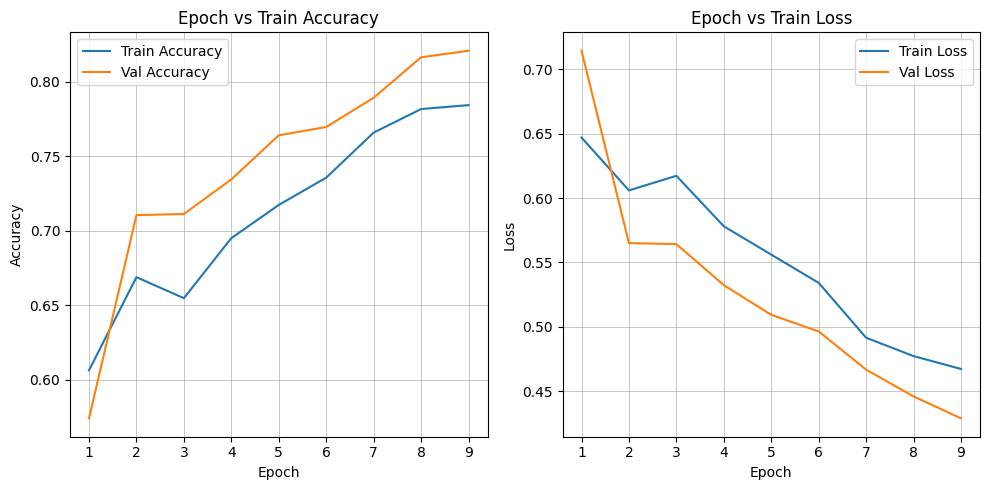

In [6]:
from helpers import create_plots

create_plots(
    train_accuracy_list=epoch_accuracys,
    train_loss_list=epoch_losses, 
    val_accuracy_list=epoch_val_accuracys,
    val_loss_list=epoch_val_losses,
    task_name=f"{task_name}",    
    epoch_list=list(range(1, len(epoch_accuracys)+1))
)


In [12]:
epochs_to_keep = 2
epoch_losses = epoch_losses[:epochs_to_keep]
epoch_accuracys = epoch_accuracys[:epochs_to_keep]
epoch_val_accuracys = epoch_val_accuracys[:epochs_to_keep]
epoch_val_losses = epoch_val_losses[:epochs_to_keep]

In [13]:
with open(metrics_file_path("train-losses"), 'wb') as f:
    pickle.dump(epoch_losses, f)
with open(metrics_file_path("train-accuracys"), 'wb') as f:
    pickle.dump(epoch_accuracys, f)
with open(metrics_file_path("val-accuracys"), 'wb') as f:
    pickle.dump(epoch_val_accuracys, f)
with open(metrics_file_path("val-losses"), 'wb') as f:
    pickle.dump(epoch_val_losses, f)
print("Updated Performace metrics saved")

Updated Performace metrics saved
